# Modelos epidemiológicos en autómatas celulares

## Interacciones e impactos sociales

A diferencia del trabajo realizado en [1] en el que cada celda representaba una región, consideraremos a cada división como un único individuo que será dotado de un conjunto de cualidades como estado de salud, edad, vecinos, etc. Estas cualidades vendrán dadas por las necesidades del modelo que estemos desarrollando, por ejemplo en los modelos clásicos no será necesario dotar de edades a las células, pero si tendremos que tener en cuenta sus vecindades y sus estados de salud.

Pensemos por un momento en las características que hay detrás de relación cercana entre individuos o células. Denotaremos la relación entre células con el símbolo $\thicksim$ y una vez dicho esto tenemos que:

*   Todas las células están en contacto con ellas mismas, por lo que para cada célula $x$ se cumple $x \thicksim x$.
*   Si una célula estuviera en contacto con alguna otra entonces esa célula estaría en contacto con la primera, es decir, $x\thicksim y$ implica $y\thicksim x$.
*   Si una célula interactúa con otras dos no implica necesariamente que estas interactúen entre sí, por lo que $x\thicksim y$ y $x\thicksim z$ no implican que $y\thicksim z$.

**Ejemplo 3.1.1:** Consideremos por ejemplo el conjunto $A=\{a,b,c,d\}$ y a la sub-colección $\mathcal{B} = \{\{a\},\{b\},\{c\},\{d\},\{a,c,d\}, \{b,c\}, \{b,d\}\}$ de $\mathcal{P}(A)$. Claramente se obtienen las siguientes relaciones

$$\begin{array}{cccc}
    a\thicksim a, & b\thicksim b, & c\thicksim c, & d\thicksim d, \\ 
    a\thicksim c, & a\thicksim d, & b\thicksim c, & b\thicksim d,
\end{array}$$

junto con sus relaciones simétricas equivalentes. Esta noción de relación de interacción entre células puede ir un poco más allá. Pensemos por un momento en el impacto que puede tener un comportamiento sobre la célula $b$ en la célula $a$, si bien estas dos celdas no interactúan entre sí, la relación que cada una de ellas tiene con las células $c$ y $d$ puede tener un impacto sobre la otra. Con lo cual definimos la siguiente relación de interacción:

**Definición 3.1.2:** Definimos el *grado de impacto* entre dos puntos $a$ y $b$ como la menor cantidad de interacciones necesaria para llegar de $a$ a $b$. Para reconocer el grado de impacto entre dos puntos usaremos la notación $a\thicksim_n b$ donde $n\in\mathbb{N}$ denota la menor cantidad de interacciones entre $a$ y $b$.

Si retomamos el ejemplo 3.1.1 podremos identificar los siguientes grados de impacto:

$$\begin{array}{cccc}
    a\thicksim_0 a, & b\thicksim_0 b, & c\thicksim_0 c, & d\thicksim_0 d, \\ 
    a\thicksim_1 c, & a\thicksim_1 d, & b\thicksim_1 c, & b\thicksim_1 d, \\
    a\thicksim_2 b, & c\thicksim_2 d.
\end{array}$$

De la definición anterior se deduce el siguiente resultado:

**Teorema 3.1.3:** Los grados de impacto de una célula $x$ definen un sistema fundamental de vecindades en la topología discreta.

Demostración: Sea $x\in\mathcal{L}$ y $\mathcal{V}(x)$ una familia de vecindades de $x$. Defina el conjunto $A_0=\{x\}$ como el conjunto de puntos con grado de impacto con $x$ es igual a cero y a continuación defina de manera recursiva a los conjuntos $A_k$ cuyos elementos tienen grado de impacto con $x$ sea igual o menor a $k$. Claramente $A_i\subseteq A_j$ para $0\leq i\leq j$ y de ese modo $A_i\in\mathcal{V}(x)$ para $i=0,1,\cdots,n$.

Defina la colección $\mathcal{A}=\{A_0,A_1,\cdots,A_k,\cdots,A_N\}$ como la familia de conjuntos encajados definidos por el grado de impacto con $x$. Dado que por hipótesis estamos sobre la topología discreta podemos afirmar que para todo $V\in\mathcal{V}(x)$ el conjunto $A_0\subseteq V$ y de ese modo por la definición 2.4.8 concluimos que la colección $\mathcal{A}$ es un sistema fundamental de vecindades de $x$.

A continuación mostraremos algunas de las propiedades del conjunto $\mathcal{A}$ definido en la demostración anterior:

**Proposición 3.1.4:** Sea $x\in\mathcal{L}$ una célula y sea $\mathcal{A}$ la familia de conjuntos encajados definidos por el grado de impacto con $x$. Se cumplen las siguientes propiedades:

1.  El conjunto $\mathcal{A}$ posee elemento mínima igual a $A_0=\{x\}$,
2.  $\mathcal{A}$ es un conjunto ordenado finito con el orden de la contenencia,
3.  $\mathcal{L}$ es un espacio $T_0$, y
4.  $\mathcal{L}$ es un espacio uno-numerable.

Demostración: Cada numeral se deduce directamente de las definiciones 2.4.11, 2.4.13, 2.4.14, 2.4.15, 2.4.16 y el teorema 3.1.3.

$\underline{\textit{Nota:}}$ Desde ahora en adelante cuando hablemos de vecinos de una célula asumiremos que son vecinos con un grado de impacto igual a 0.

Una vez establecidos los conceptos de topología implementados para nuestro espacio $\mathcal{L}$ y sus sistemas fundamentales de vecindades podemos definir cada una de las reglas que implementaremos para cada modelo epidemiológico.

## Reglas de evolución

En esta sección partiremos de una abstracción sobre la naturaleza de los modelos epidemiológicos definidos en el capítulo 1, esto nos permitirá definir de manera intuitiva las reglas de evolución de nuestros modelos en autómatas celulares.

Antes de comenzar a definir nuestras reglas de evolución definiremos las siguientes notaciones:

*  Denotaremos por $\pi^t(x)$ al estado de la célula $x$ en el momento $t$.
*  Para describir la cantidad de vecinos de una célula $x$ que tengan un estado $K$ en un momento $t$ usaremos el símbolo $\sigma_K^t(x)$.
*  Usaremos los símbolos $\mathcal{S}^t,\mathcal{I}^t,\mathcal{R}^t$ y $\mathcal{D}^t$ para denotar a los conjuntos de células susceptibles, infectadas, recuperadas y muertas respectivamente en el espacio $\mathcal{L}$ en el tiempo $t$. De manera formal
    $$\mathcal{S}^t=\{x\in\mathcal{L}:\pi^t(x)=S\},$$
    y de manera análoga se definen los conjuntos $\mathcal{I}^t,\mathcal{R}^t$ y $\mathcal{D}^t$. Note que $$\mathcal{S}^t\cup\mathcal{I}^t\cup\mathcal{R}^t\cup\mathcal{D}^t=\mathcal{L}\text{ para todo tiempo }t.$$

### Modelos SIS y SIR simples

Recordemos que para las tasas de infección $\beta$ y de recuperación $\alpha$ los modelos SIS y SIR nos afirman que para $\mathcal{R}_0=\frac{\beta}{\alpha}>1$ la enfermedad será endémica. Trataremos de replicar inicialmente esté comportamiento de manera local sobre una célula analizando los siguientes escenarios para cada estado:

*  Para el caso $\mathcal{R}_0>1$, la probabilidad de que un individuo susceptible se enferme luego de tener contacto con un infectado es más alta que la probabilidad de continuar susceptible a la enfermedad; caso contrario ocurre sí $\mathcal{R}_0<1$. Esta probabilidad de adquirir la enfermedad depende en gran medida de la cantidad de individuos infectados que la célula tenga en su vecindad. 
    
*  Como vimos en el capítulo 1 la recuperación de los individuos infectados no se ve afectada por la cantidad de contactos con otras células y en lugar de eso depende completamente de la tasa de recuperación $\alpha$, la cual en nuestro caso entenderemos como la proporción de individuos infectados que se recuperan de la enfermedad.
    
*  Para el estado de inmunidad en el modelo SIR, supondremos que los individuos que posean este estado se mantendrán inmunes. Esto quiere decir que la transformación para individuos recuperados será constante.

De manera natural definimos las siguientes reglas de evolución para los modelos SIS y SIR en autómatas celulares:

**Definición 3.2.1:** Dada una célula $x$ en un conjunto $\mathcal{L}$ definimos la regla de evolución para el modelo SIS como:

\begin{equation}
    \phi_{SIS}^t(x)=\left\{\begin{array}{ll}
        S & \text{si }\pi^t(x)=S\text{ y }\rho\leq\frac{\beta}{\alpha}\frac{\pi_I^t(x)}{\#\mathcal{V}(x)}, \\
        I & \text{si }\pi^t(x)=S\text{ y }\rho>\frac{\beta}{\alpha}\frac{\pi_I^t(x)}{\#\mathcal{V}(x)}, \\
        I & \text{si }\pi^t(x)=I\text{ y }\rho>\alpha,\\
        S & \text{si }\pi^t(x)=I\text{ y }\rho\leq\alpha.
    \end{array}\right.
\end{equation}

Donde $\rho\in\mathcal{U}_{[0,1]}$.
    
**Definición 3.2.2:** Dada una célula $x$ en un conjunto $\mathcal{L}$ definimos la regla de evolución para el modelo SIR como:

\begin{equation}
    \phi_{SIR}^t(x)=\left\{\begin{array}{ll}
        S & \text{si }\pi^t(x)=S\text{ y }\rho\leq\frac{\beta}{\alpha}\frac{\pi_I^t(x)}{\#\mathcal{V}(x)}, \\
        I & \text{si }\pi^t(x)=S\text{ y }\rho>\frac{\beta}{\alpha}\frac{\pi_I^t(x)}{\#\mathcal{V}(x)}, \\
        I & \text{si }\pi^t(x)=I\text{ y }\rho>\alpha,\\
        R & \text{si }\pi^t(x)=I\text{ y }\rho\leq\alpha, \\
        R & \text{si }\pi^t(x)=R.
    \end{array}\right.
\end{equation}

Con $\rho\in\mathcal{U}_{[0,1]}$.

In [1]:
from EpidemiologicalModels.NeighborhoodManager import *
from EpidemiologicalModels.epidemiologicalModels import *
from EpidemiologicalModels.DefineSpaceInCA import *

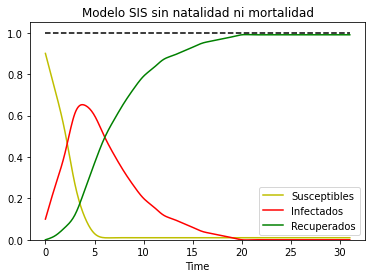

In [2]:
a=0.2; b=0.5
system = initialCondition(0.1, np.zeros((10,10)))
neigborhoodSystemMoore = Von_Neumann(system)
SISmodel = models("sir",a,b,system,neigborhoodSystemMoore,[1,0])

SISmodel.metricsPlot(30,"Modelo SIS sin natalidad ni mortalidad")

### Modelos con natalidad y mortalidad
Partiendo del principio de que los análisis desarrollados en nuestra investigación tengan una mayor aplicabilidad en el ámbito epidemiológico decidimos separarnos un poco de los modelos clásicos, ya que en estos se supone que las tasas de natalidad y mortalidad son iguales y esto no necesariamente se cumple en el mundo real.

La segunda característica que tendremos en mente para definir nuestra regla de evolución parte de hipótesis de que los individuos en un sistema tienen una probabilidad de fallecer por causas ajenas a la enfermedad que depende de la edad del mismo individuo.

Para implementar la noción de edad de una célula inicialmente tendremos que modificar el dominio de nuestra regla de evolución. Para estos modelos debemos tener en cuenta el estado de la célula central junto con su edad y el estado de sus vecinos, de modo que 

$$Dom(\phi_\mu)=\Sigma_x\times K\times\overbrace{\Sigma\times\cdots\times\Sigma}^N\text{, con }K=\{1,2,\cdots,100\},$$

si suponemos que la edad de la célula $x$ puede ir de 1 a 100 unidades temporales (semanas, meses, años, etc.).

Otra característica que podemos implementar en nuestro modelo es la del envejecimiento de las células, esto con el objetivo de analizar el impacto de una enfermedad sobre los individuos de un sistema en diferentes etapas de su "vida". La manera en la que abordaremos esta idea será con el siguiente ajuste en el rango de nuestra regla

$$Ran(\phi_\mu)=\Sigma_x\times K.$$

Dado que estamos trabajando sobre poblaciones de tamaño constante la manera en la que interpretaremos el nacimiento de una célula será con la ocupación del espacio que deja una que muere. Para esto identificaremos a los espacios que dejan las células que mueren con el estado $D$ y una edad cero, esto nos permitirá separar a los espacios que pueden ocuparse y los que no de células que interactúen con sus vecinos. Al igual que en los modelos descritos en el capítulo 1 asumiremos que los individuos que "nacen" son susceptibles a la enfermedad.

Teniendo estas ideas en mente podemos definir la regla de evolución para un modelo epidemiológico $M$ de la siguiente manera:

**Definición 3.2.3:** Sea $x$ una célula en un conjunto $\mathcal{L}$, $M$ un modelo epidemiológico y $T$ una unidad temporal (días, meses, años, etc.). Definimos la regla de evolución con nacimientos y muertes para $M$ como:

\begin{equation}
    \mu_{M,T}^t(x)=\left\{\begin{array}{ll}
        D,0 & \text{si }t\not\equiv 0 \text{ (modulo }T\text{), }\pi^t(x)\in\{S,I,R\}\text{ y }\rho\leq\omega_k, \\
        D,0 & \text{si }\pi^t(x)=D\text{ y }\rho>b,\\
        S,1 & \text{si }\pi^t(x)=D\text{ y }\rho\leq b,\\
        \phi_M^t(x),E^t(x) & \text{si }t\not\equiv 0 \text{ (modulo }T),\\
        \phi_M^t(x),E^t(x)+1 & \text{si }t\equiv 0 \text{ (modulo }T),
    \end{array}\right.
\end{equation}

donde $\omega_k$ es la probabilidad de morir por causas ajenas a la enfermedad para las edades en la partición k-ésima del intervalo $[0,100]$, $b$ es la tasa de natalidad, $\phi_M^t$ es la regla de evolución del modelo epidemiológico, $E^t(x)$ denota la edad de la célula $x$ en el momento $t$ y $\rho\in\mathcal{U}_{[0,1]}$.

In [3]:
from EpidemiologicalModels.BirthAndMortavilityModel import *

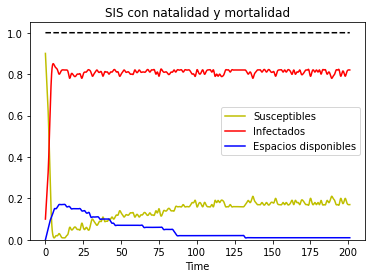

In [4]:
system1 = initialCondition(0.1,np.zeros((10,10)))
neigborhoodSystemMoore1 = Von_Neumann(system1)
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
ages_sys1 = agesMatrix(ranges,system1)

mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

sm_1 = models("sis_birthAndMortavility",0.2,0.5,system1,neigborhoodSystemMoore1,[1,0])
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.systemAges = ages_sys1; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIS con natalidad y mortalidad")

### Modelos con muerte por enfermedad
En esta sección nos enfocaremos en definir la versión más general de los modelos epidemiológicos clásicos en ecuaciones diferenciales definidas en el capítulo 1. La muerte por enfermedad afectará únicamente a las células que posean la enfermedad y, buscando una mayor aplicabilidad sobre eventos más realistas asumiremos que la enfermedad puede tener un mayor impacto mortal sobre algunas edades. 

Al igual que en la sección anterior, realizaremos una partición sobre el intervalo $[0,100]$ y definiremos una probabilidad $\theta_k$ que indique la probabilidad de morir a causa de la enfermedad en la k-ésima partición. De manera formal:

**Definición 3.2.4:** Sea $x$ una célula en un conjunto $\mathcal{L}$, $M$ un modelo epidemiológico y $T$ una unidad temporal (días, meses, años, etc.). Definimos la regla de evolución con muerte por enfermedad para $M$ como:

\begin{equation}
    \theta_{M,T}^t(x)=\left\{\begin{array}{ll}
        D,0 & \text{si }\pi^t(x)=I\text{ y }\rho\leq\theta_k, \\
        \mu_{M,T}^t(x) & \text{en otro caso.}
    \end{array}\right.
\end{equation}

Donde $\theta_k$ es la probabilidad de morir por la enfermedad para los individuos con una edad en el intervalo k-ésimo de la partición del intervalo $[0,100]$, $\mu_{M,T}^t$ es la regla de evolución para modelos con nacimientos y muertes y $\rho\in\mathcal{U}_{[0,1]}$.

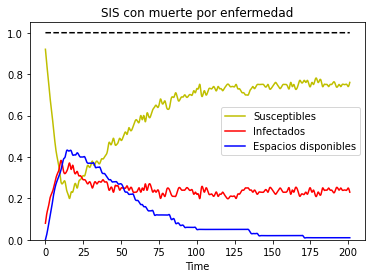

In [5]:
system = initialCondition(0.1,np.zeros((10,10)))
neigborhoodSystemMoore = Von_Neumann(system)
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2
ages_sys3 = agesMatrix(ranges,system)
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]

sm_1 = models("sis_deathByDisease",0.2,0.5,system,neigborhoodSystemMoore,[1,0])
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.deathFromDiseaseByAgeRange = ranges_dead
sm_1.systemAges = ages_sys3; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIS con muerte por enfermedad")

## Referencias 
1. A.Holkoa, M.Medrek, Z.Pastuszakb, and K.Phusavat. Epidemiological modeling with apopulation density map-based cellular automata simulation system.ELSEVIER, 2016.